In [1]:
import matplotlib.pyplot as pld
import pydotplus
import pandas as cdf
from sklearn.metrics import f1_score, precision_score,accuracy_score, recall_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
# create a pandas dataframe from the dataset.
dst = cdf.read_csv("fraudTrain.csv")

# Display the data's first few rows
dst.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# Delete any extra columns.
dst.drop(columns=["Unnamed: 0", "trans_date_trans_time", "first", "last", "street", "city", "state", "zip", "dob", "trans_num", "unix_time", "merch_lat", "merch_long","job"], inplace=True)
dst.head()


,cc_num,merchant,category,amt,gender,lat,long,city_pop,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,0


In [4]:
# Use one-hot encoding to transform variables to numerical values.
dst = cdf.get_dummies(dst, columns=["gender", "merchant", "category"])
dst.head()


,cc_num,amt,lat,long,city_pop,is_fraud,gender_F,gender_M,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2703186189652095,4.97,36.0788,-81.1781,3495,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,630423337322,107.23,48.8878,-118.2105,149,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,38859492057661,220.11,42.1808,-112.2620,4154,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,46.2306,-112.1138,1939,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,375534208663984,41.96,38.4207,-79.4629,99,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# Create training and testing sets from the dataset.
A = dst.drop(columns=["is_fraud"])
b = dst["is_fraud"]
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)



In [6]:
# Launch a classifier with a decision tree.
cla = DecisionTreeClassifier()




In [7]:
# fit the training data to the decision tree classifier.
cla.fit(A_train,b_train)


DecisionTreeClassifier()

In [8]:
# utilizing the fitted model, make predictions based on the test data.
b_pred = cla.predict(A_test)


# assess the model's effectiveness
print("Recall:", recall_score(b_test, b_pred))
print("F1 score:", f1_score(b_test, b_pred))
print("Precision:", precision_score(b_test, b_pred))
print("Accuracy:", accuracy_score(b_test, b_pred))


Recall: 0.6611842105263158
F1 score: 0.6519623743107363
Precision: 0.6429942418426103
Accuracy: 0.9958624944569765


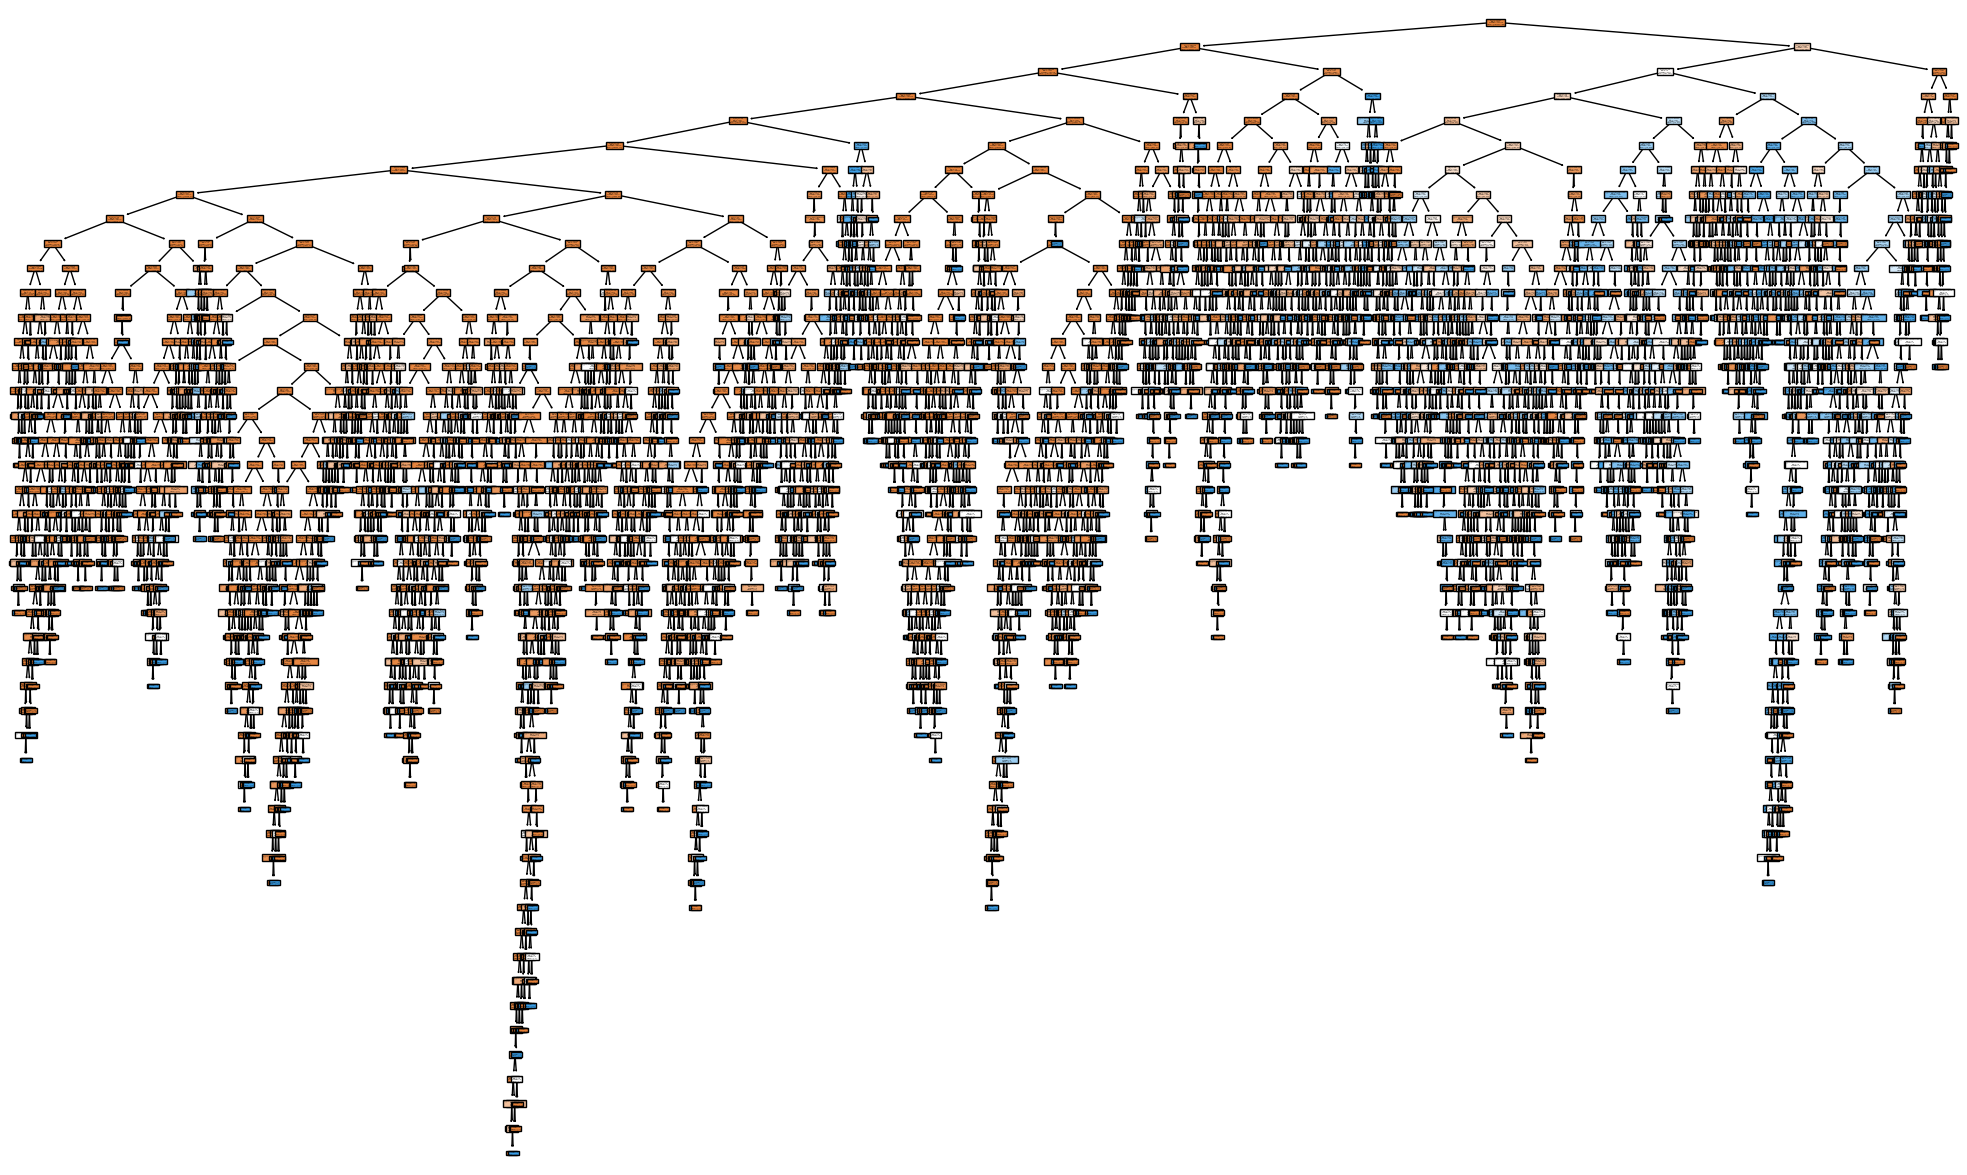

In [9]:
# Matplotlib is used to plot the binary tree.
pld.figure(figsize=(25,15))
plot_tree(cla, filled=True)
pld.show()
